In [140]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Importando Datos y estructurando datos Daves

In [191]:
Davis = pd.read_csv('Data_Original/Datos_Daves_09092020_11092020_.txt', sep="	", header=None)
Davis.columns = ["{}_{}".format(Davis.iloc[0][i], Davis.iloc[1][i]).replace("nan_","") for i in Davis.columns]
Davis = Davis.drop(index=[0,1])
_Time=[]
for i in Davis["Time"]:
    if(len(i) == 4): _Time.append("0"+i)
    else: _Time.append(i) 

Davis["Date_Time"] = Davis["Date"] +"_" + _Time #String Date Time
Davis["Date_Time"] = [datetime.strptime(i, "%d/%m/%y_%H:%M") + timedelta(days=33,hours=1+5,minutes=14) for i in Davis["Date_Time"]] #Lista de DateTime y correccion de tiempo
Davis.drop(columns = ["Date", "Time"], inplace=True) #Elimina Columnas originales de Date y Time

keys_floats = list(Davis.columns[0:6].values) + list(Davis.columns[7:9]) + list(Davis.columns[10:-1].values)
Davis[keys_floats] = Davis[keys_floats].astype("float", inplace = True)
Davis.columns

Index(['Temp_Out', 'Hi_Temp', 'Low_Temp', 'Out_Hum', 'Dew_Pt.', 'Wind_Speed',
       'Wind_Dir', 'Wind_Run', 'Hi_Speed', 'Hi_Dir', 'Wind_Chill',
       'Heat_Index', 'THW_Index', 'Bar  ', 'Rain', 'Rain_Rate', 'Heat_D-D ',
       'Cool_D-D ', 'In _Temp', 'In_Hum', 'In _Dew', 'In _Heat', 'In _EMC',
       'In Air_Density', 'Wind_Samp', 'Wind_Tx ', 'ISS _Recept', 'Arc._Int.',
       'Date_Time'],
      dtype='object')

In [220]:
#Se importan datos de EVA1
EVA1 = pd.read_csv('Data_Original/EVA1_05092020_12092020_.csv', sep=",")
EVA1["timestamp"] = EVA1["timestamp"].astype("datetime64")
EVA1.columns

#Se importan datos de EVA1
EVA2 = pd.read_csv('Data_Original/EVA2_05092020_12092020_.csv', sep=",")
EVA2["timestamp"] = EVA2["timestamp"].astype("datetime64")
EVA2.columns

#Se importan datos de EVA1
EVA3 = pd.read_csv('Data_Original/EVA2_05092020_12092020_.csv', sep=",")
EVA3["timestamp"] = EVA3["timestamp"].astype("datetime64")
EVA3.columns

Index(['timestamp', 'pm10', 'pm2.5', 'pm1', 'noise', 'illuminance',
       'irradiance', 'temperature', 'humidity', 'presure', 'voltage', 'batery',
       'panel', 'sensor'],
      dtype='object')

In [225]:
def Get_var(Data,name_variable):
    variable = json_normalize(  [json.loads( i  ) for i in Data[name_variable].dropna()] )
    variable["Date_Time"] = list(Data[["timestamp",name_variable]].dropna()["timestamp"])
    return variable
EVA1_temp = Get_var(EVA1,"temperature")
EVA2_temp = Get_var(EVA2,"temperature")

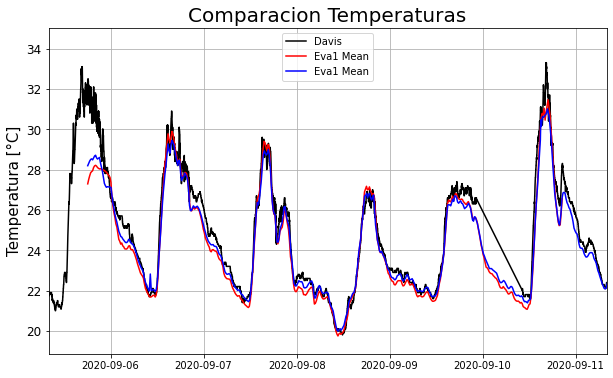

In [292]:
plt.figure(figsize = [10,6])

plt.plot(Davis["Date_Time"], Davis["THW_Index"], color ='black', label = 'Davis')
plt.plot(EVA1_temp["Date_Time"], EVA1_temp["value"], color ='red', label = 'Eva1 Mean')
plt.plot(EVA2_temp["Date_Time"], EVA2_temp["value"], color ='blue', label = 'Eva1 Mean')
#plt.plot(EVA1_temp["Date_Time"], EVA1_temp["value"], color ='red', label = 'Eva1 Mean')
#plt.plot(EVA1_temp["Date_Time"], EVA1_temp["max"], marker='.',ls = '', color ='green', label = 'Eva1 max')
#plt.plot(EVA1_temp["Date_Time"], EVA1_temp["min"], marker='.',ls = '', color ='blue', label = 'Eva1 min')
#(_, caps, _) = plt.errorbar(EVA1_temp["Date_Time"],EVA1_temp["value"],EVA1_temp["sd"],None, color ='blue', ecolor = 'black',capsize=1,label = 'EVA1')
#(_, caps, _) = plt.errorbar(EVA2_temp["Date_Time"],EVA2_temp["value"],EVA2_temp["sd"],None, color ='red', ecolor = 'black',capsize=1,label = 'EVA2')

for cap in caps:
    cap.set_markeredgewidth(1)
plt.grid()
plt.title("Comparacion Temperaturas",fontsize=20)
#plt.xlabel("Sufaces",fontsize=17)
plt.yticks(fontsize=12) 
#plt.xticks(Sup, ("Surface1", "Surface2", "Surface3"), fontsize=18) 
plt.xlim(datetime(2020,9,5,8), datetime(2020,9,11,8))
plt.ylabel("Temperatura [°C]",fontsize=15)
plt.legend(fontsize = 10)


In [298]:


def Get_DataStruct_EVA(Referencia, Variable ,Data_eva, n_prom):
    delta = timedelta(seconds=31)
    new_data= []
    for i in Data_eva.transpose():
        t_m = Data_eva["Date_Time"][i]
        index = Referencia["Date_Time"][ (Referencia["Date_Time"] > t_m - delta) & (Referencia["Date_Time"] < t_m + delta) ].index
        if(index.empty): continue
        index = list(index)[0]
        Reference_window = Referencia[Variable][index-n_prom:index]
        new_data.append( [t_m, Reference_window.mean(), Reference_window.max(), Reference_window.min(), Reference_window.std()] )
    return pd.DataFrame(new_data,columns=["Date_Time", "value", "max", "min", "sd"])
Davis_THW_Index = Get_DataStruct_EVA(Davis, "THW_Index", EVA1_temp,15)

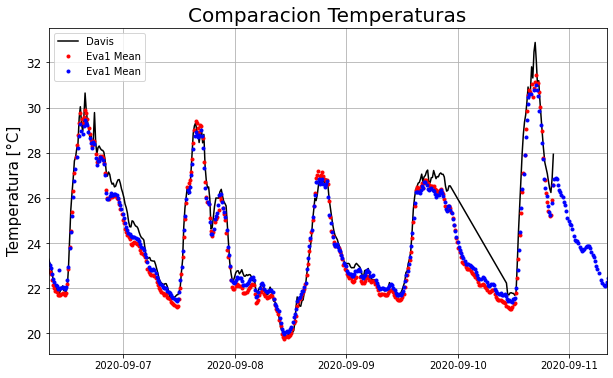

In [326]:
plt.figure(figsize = [10,6])

plt.plot(Davis_THW_Index["Date_Time"], Davis_THW_Index["value"], color ='black', label = 'Davis')
plt.plot(EVA1_temp["Date_Time"], EVA1_temp["value"],marker='.',ls = '', color ='red', label = 'Eva1 Mean')
plt.plot(EVA2_temp["Date_Time"], EVA2_temp["value"],marker='.',ls = '', color ='blue', label = 'Eva1 Mean')
#plt.plot(EVA1_temp["Date_Time"], EVA1_temp["max"], marker='.',ls = '', color ='green', label = 'Eva1 max')
#plt.plot(EVA1_temp["Date_Time"], EVA1_temp["min"], marker='.',ls = '', color ='blue', label = 'Eva1 min')
#(_, caps, _) = plt.errorbar(EVA1_temp["Date_Time"],EVA1_temp["value"],EVA1_temp["sd"],None, color ='blue', ecolor = 'black',capsize=1,label = 'EVA1')
#(_, caps, _) = plt.errorbar(EVA2_temp["Date_Time"],EVA2_temp["value"],EVA2_temp["sd"],None, color ='red', ecolor = 'black',capsize=1,label = 'EVA2')

for cap in caps:
    cap.set_markeredgewidth(1)
plt.grid()
plt.title("Comparacion Temperaturas",fontsize=20)
#plt.xlabel("Sufaces",fontsize=17)
plt.yticks(fontsize=12) 
#plt.xticks(Sup, ("Surface1", "Surface2", "Surface3"), fontsize=18) 
plt.xlim(datetime(2020,9,6,8), datetime(2020,9,11,8))
plt.ylabel("Temperatura [°C]",fontsize=15)
plt.legend(fontsize = 10)

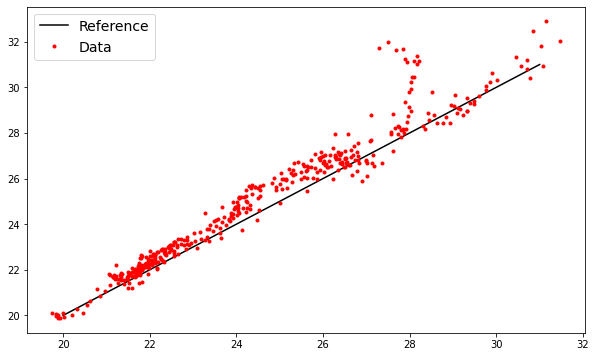

In [339]:
plt.figure(figsize = [10,6])
EVA = EVA1_temp[ EVA1_temp.isin(list(Davis_THW_Index.Date_Time)).Date_Time ]
plt.plot(range(20,32),range(20,32), color ='black', label = 'Reference')
plt.plot(EVA["value"], Davis_THW_Index["value"],marker='.',ls = '', color ='red', label = 'Data')
plt.legend(fontsize = 14)

[Timestamp('2020-09-10 20:33:04'),
 Timestamp('2020-09-10 20:17:52'),
 Timestamp('2020-09-10 20:01:42'),
 Timestamp('2020-09-10 19:45:33'),
 Timestamp('2020-09-10 19:30:18'),
 Timestamp('2020-09-10 19:15:04'),
 Timestamp('2020-09-10 18:58:34'),
 Timestamp('2020-09-10 18:43:22'),
 Timestamp('2020-09-10 18:23:47'),
 Timestamp('2020-09-10 18:02:30'),
 Timestamp('2020-09-10 17:39:17'),
 Timestamp('2020-09-10 17:24:04'),
 Timestamp('2020-09-10 17:08:51'),
 Timestamp('2020-09-10 16:53:39'),
 Timestamp('2020-09-10 16:38:24'),
 Timestamp('2020-09-10 16:23:13'),
 Timestamp('2020-09-10 16:08:01'),
 Timestamp('2020-09-10 15:52:46'),
 Timestamp('2020-09-10 15:37:30'),
 Timestamp('2020-09-10 15:22:17'),
 Timestamp('2020-09-10 15:06:49'),
 Timestamp('2020-09-10 14:51:23'),
 Timestamp('2020-09-10 14:36:10'),
 Timestamp('2020-09-10 14:20:53'),
 Timestamp('2020-09-10 14:05:34'),
 Timestamp('2020-09-10 13:50:22'),
 Timestamp('2020-09-10 13:33:12'),
 Timestamp('2020-09-10 13:17:57'),
 Timestamp('2020-09-

In [321]:
Davis_THW_Index.Date_Time[70]

Timestamp('2020-09-09 14:26:00')

In [325]:
len(Davis_THW_Index)

428